<a href="https://colab.research.google.com/github/HanishDhanwalkar/SideProjects/blob/main/HandwrittenDigits/HandwrittenDigitsRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.datasets import mnist

In [58]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

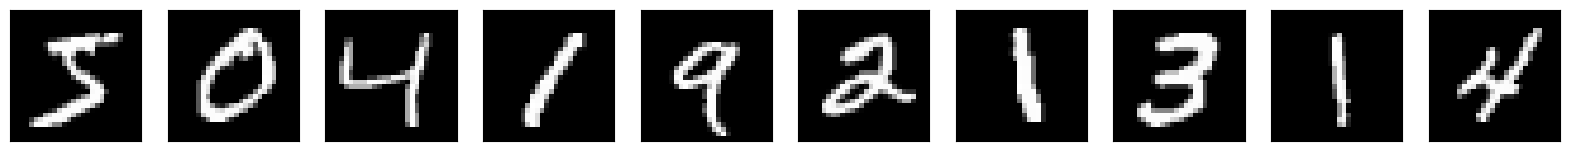

In [59]:
import matplotlib.pyplot as plt

n = 10
plt. figure(figsize = (20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt. imshow(x_train[i].reshape(28, 28))
    plt. gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [60]:
print(y_train[1])

0


In [61]:
x_train.shape

(60000, 28, 28)

In [99]:
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation = 'relu'),
    # layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train)

1875/1875 [==============================] - 9s 5ms/step - loss: 2.7939 - accuracy: 0.8892


In [100]:
preds=model.predict(x_test)
preds = np.argmax(preds, axis=1)


313/313 [==============================] - 1s 2ms/step


In [101]:
loss =0
for i in range(len(y_test)):
  l = preds[i] - y_test[i]
  if l != 0:
    loss += 1

print(loss/len(y_test))

0.0827


In [102]:
ntest = 10
X = []
for i in range(ntest):
  X.append(x_test[i])

X = np.array(X)
X = X.reshape(ntest, 28,28,1)
print(np.shape(X))
print(np.shape(x_test))


(10, 28, 28, 1)
(10000, 28, 28)


1/1 [==============================] - 0s 61ms/step
[7 2 1 0 4 1 4 9 6 9]


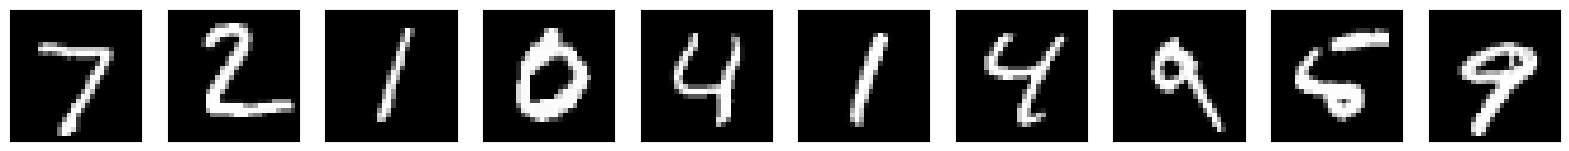

In [103]:
plt. figure(figsize = (20, 4))

for i in range(ntest):
    ax = plt.subplot(2, n, i + 1)
    plt. imshow(x_test[i].reshape(28, 28))
    plt. gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

preds1 = model.predict(X)
preds1 = np.argmax(preds1, axis=1)
print(preds1)